# Preparing the dataset

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Saving the Spectrogram of a single audio file
def save_spectrogram(curr_audio_path, curr_audio_name):
    X, sr = librosa.load(curr_audio_path)  # librosa.load() returns an np array and sampling rate(by default 22050)
    plt.specgram(X, Fs=22050)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.plot
    plt.savefig('spectrograms/' + curr_audio_name,  bbox_inches= 'tight' , pad_inches = 0, dpi = 25)

In [3]:
from keras.preprocessing import image
from PIL import Image

rootdir = 'spectrograms/'

X = []
Y = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        curr_img_path = os.path.join(subdir, file)  # The path of current image file
        curr_img_path = os.path.normpath(curr_img_path)  # To get '\' instead of '/'
        curr_img_name = os.path.splitext(file)[0]   # The name of current image file (withoud .png extension)
        img = image.load_img(curr_img_path, target_size = (64, 64))  # Load the actual image file
        img = image.img_to_array(img)        # Convert the loaded image file to the array
        cls = int(curr_img_name.split('-')[1])
        X.append(img)
        Y.append(cls)
print(len(X), len(Y))
print(X[0].shape)

Using TensorFlow backend.


8732 8732
(64, 64, 3)


In [4]:
from keras.utils import to_categorical
X = np.array(X)
Y = np.array(Y)
Y = to_categorical(Y)   # One hot encoding
X.shape, type(X), Y.shape, type(Y), (Y[0])

((8732, 64, 64, 3),
 numpy.ndarray,
 (8732, 10),
 numpy.ndarray,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6549, 64, 64, 3) (6549, 10)
(2183, 64, 64, 3) (2183, 10)


# Training the CNN

In [6]:
num_classes = 10
input_width = 64
input_height = 64
input_channels = 3
input_shape = (input_width, input_height, input_channels)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import optimizers

In [8]:
# Model with 2 dropout layers (dropout rates as 0.30 and 0.50) and learning_rate=0.0005
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.30))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizers.Adam(lr=0.0005),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [9]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Train on 6549 samples, validate on 2183 samples
Epoch 1/50
6549/6549 [==============================] - 25s 4ms/step - loss: 2.7128 - accuracy: 0.2095 - val_loss: 1.8601 - val_accuracy: 0.3165
Epoch 2/50
6549/6549 [==============================] - 23s 4ms/step - loss: 1.7899 - accuracy: 0.3549 - val_loss: 1.5729 - val_accuracy: 0.4572
Epoch 3/50
6549/6549 [==============================] - 24s 4ms/step - loss: 1.5995 - accuracy: 0.4327 - val_loss: 1.4856 - val_accuracy: 0.4663
Epoch 4/50
6549/6549 [==============================] - 24s 4ms/step - loss: 1.4782 - accuracy: 0.4760 - val_loss: 1.3882 - val_accuracy: 0.5062
Epoch 5/50
6549/6549 [==============================] - 23s 4ms/step - loss: 1.3888 - accuracy: 0.5068 - val_loss: 1.3911 - val_accuracy: 0.5007
Epoch 6/50
6549/6549 [==============================] - 24s 4ms/step - loss: 1.3149 - accuracy: 0.5399 - val_loss: 1.2500 - val_accuracy: 0.5790
Epoch 7/50
6549/6549 [==============================] - 23s 4ms/step - loss: 1.243

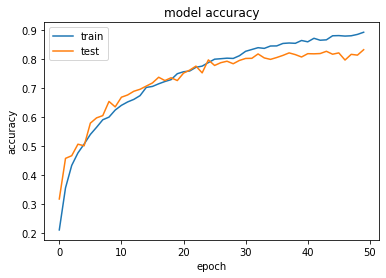

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(X_test, Y_test)
print(score)

2183/2183 [==============================] - 3s 1ms/step
[0.5250703431682963, 0.8332569599151611]


In [21]:
# Save the model, so that we can use this trained model later also
model.save('saved_models/UrbanSoundCNN4.h5')

In [13]:
Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)
y_test_pred = np.argmax(Y_test_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)
y_train_pred = np.argmax(Y_train_pred, axis=1)
y_train = np.argmax(Y_train, axis=1)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
print(confusion_matrix(y_test, y_test_pred))

[[226   0   4   2   1   3   0   2   2   4]
 [  0  81   2   3   3   2   1   0   6   6]
 [  6   2 173  18   6  13   1   1   8  31]
 [  2   1  13 179   4   6   2   1   5  11]
 [  2   1   4   5 225   3   1   9   0   6]
 [ 15   1   8   1   2 229   0   3   4   3]
 [  1   1   0   2   1   0 101   1   0   0]
 [  7   0   2   0  17   0   0 207   0   3]
 [  8   3   2   2   3   2   0   1 227   4]
 [ 10   6  18   5   4   5   0   8   8 171]]


In [16]:
print(confusion_matrix(y_train, y_train_pred))

[[753   0   0   0   0   3   0   0   0   0]
 [  2 317   4   0   0   1   0   0   0   1]
 [ 14   0 673   6   1  17   0   0   3  27]
 [  1   2  11 742   2   3   0   0   1  14]
 [  1   2   1   0 720   5   1   5   0   9]
 [ 15   0   8   3   0 705   0   0   0   3]
 [  0   0   0   0   0   0 266   1   0   0]
 [  3   0   1   0   5   2   0 752   0   1]
 [  2   1   0   1   0   1   0   0 669   3]
 [ 15   3  12   6   1   4   0   1   5 718]]


In [17]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       244
           1       0.84      0.78      0.81       104
           2       0.77      0.67      0.71       259
           3       0.82      0.80      0.81       224
           4       0.85      0.88      0.86       256
           5       0.87      0.86      0.87       266
           6       0.95      0.94      0.95       107
           7       0.89      0.88      0.88       236
           8       0.87      0.90      0.89       252
           9       0.72      0.73      0.72       235

    accuracy                           0.83      2183
   macro avg       0.84      0.84      0.84      2183
weighted avg       0.83      0.83      0.83      2183



In [18]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       756
           1       0.98      0.98      0.98       325
           2       0.95      0.91      0.93       741
           3       0.98      0.96      0.97       776
           4       0.99      0.97      0.98       744
           5       0.95      0.96      0.96       734
           6       1.00      1.00      1.00       267
           7       0.99      0.98      0.99       764
           8       0.99      0.99      0.99       677
           9       0.93      0.94      0.93       765

    accuracy                           0.96      6549
   macro avg       0.97      0.97      0.97      6549
weighted avg       0.96      0.96      0.96      6549



In [22]:
print(accuracy_score(y_test, y_test_pred))

0.8332569857993587


In [23]:
print(accuracy_score(y_train, y_train_pred))

0.9642693540998626
